# Thermal Physics - Homework 5
> Alfaifi, Ammar - 201855360

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.constants as con
from scipy.special import comb
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('pdf')
plt.rcParams |= {
    'text.usetex': True,
    'figure.figsize': (10, 4)
}
sns.set_theme()
set_matplotlib_formats('svg', 'pdf')

## Question 1
Consider two-state paramagnet of $N=150$ identical dipoles in a magentic field of strength
$B$, each of which has a magnetic dipole moment of $\mu$

### Numeriacal Solution
$$
 \frac{U}{\mu B} = N - 2N_\uparrow \qquad
 \frac{S}{k} = \Omega(N_\uparrow) = \begin{pmatrix} N \\ N_\uparrow \end{pmatrix}
$$

### Analytical Solution
We take (3.28)
$$
\frac{S}{k} = N \ln{N} - N_\uparrow \ln{N_\uparrow} - (N - N_\uparrow) \ln{(N - N_\uparrow)}
$$
and for substituting (3.30) in (3.31) we have
$$
 \frac{U}{\mu B} = -N \tanh{\frac{1}{2} \ln{2\frac{N_\uparrow}{N - N_\uparrow}}}
$$

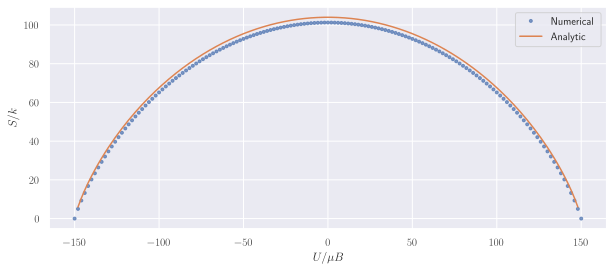

In [39]:
N = 150
N_up = np.arange(N + 1)

# unitless energy: U/mu B
energy = N - 2 * N_up
# unitless entropy: S/k
entropy = np.log(comb(N, N_up))
# remove first and last val, invlid
N_up_ = N_up[1:-1]
# analytic unitless energy: U/mu B
energy_anal = - N * np.tanh(0.5 * np.log((N - energy[1:-1]) / (N + energy[1:-1])))
# analytic unitless entropy: S/k
entropy_anal = N * np.log(N) - N_up_ * np.log(N_up_) - (N - N_up_) * np.log(N - N_up_)

plt.plot(energy, entropy, '.', label='Numerical', alpha=0.7)
plt.plot(energy_anal, entropy_anal, label='Analytic')
plt.xlabel(r'$U/\mu B$')
plt.ylabel(r'$S/k$')
plt.legend()
plt.show()

## Question 1
### Numerical Solution
We use the following realtion between entropy,  energy and temperatur
$$
    T = \frac{\partial U}{\partial S} \qquad 
    \frac{kT}{\mu B} =-2 \frac{\Delta N_\uparrow}{\Delta \Omega(N_\uparrow)}
$$
Note is always $\Delta N_\uparrow = 1$

### Analytic Solution
Using
$$
  \frac{\mu B}{kT} = \frac{1}{2} \ln{\left( \frac{N - U/\mu B}{N + U/\mu B} \right)}
$$

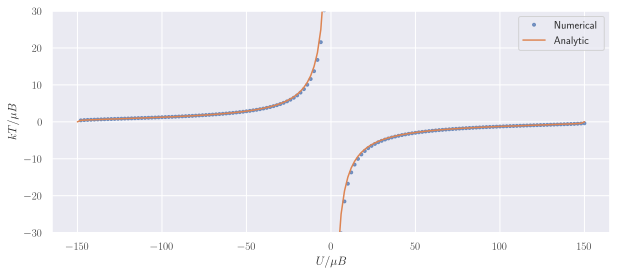

In [58]:
# Numerical unitless temprature
temp = -2 / np.diff(entropy)
# Analytical unitless temprature
with np.errstate(divide='ignore'):
    # ignore warning of dividing by zero
    temp_anal = 1 / (0.5* np.log((N - energy) / (N + energy)))
    
plt.plot(energy[:-1], temp, '.', label='Numerical', alpha=0.7)
plt.plot(energy, temp_anal, label='Analytic')
plt.xlabel(r'$U/\mu B$')
plt.ylabel(r'$kT/\mu B$')
plt.ylim([-30, 30])
plt.legend()
plt.show()

## Question 3

$$
    \frac{M}{N \mu} = - \frac{U}{B}
$$

From (3.32)
$$
    \frac{M}{N \mu} = \tanh{\frac{\mu B}{kT}}
$$

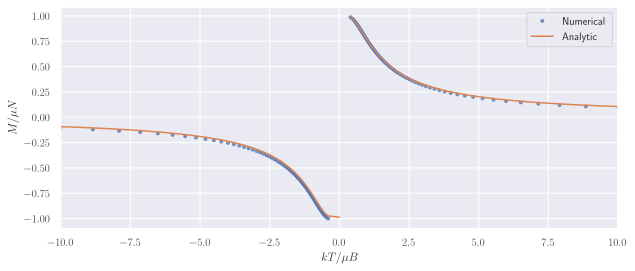

In [78]:
# Numerical Magetiztion
x = 1 / temp
# Analytic Magetiztion
Mag = - energy / N

plt.plot(temp, Mag[:-1], '.', label='Numerical', alpha=0.7)
plt.plot(temp_anal[:-1], np.tanh(x), label='Analytic')
plt.xlabel(r'$kT/\mu B$')
plt.ylabel(r'$M/\mu N$')
plt.xlim([-10, 10])
plt.legend()
plt.show()

## Question 4

We use (3.33) For analytical solution.

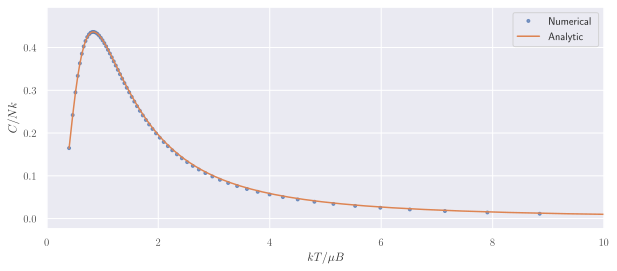

In [87]:
# Numerical Capacity
cap = 1 / temp
# Analytic Capacity
with np.errstate(divide='ignore'):
    cap_anal = (1 / temp_anal[:-1] / np.cosh(x))**2

plt.plot(temp, Mag, '.', label='Numerical', alpha=0.7)
plt.plot(temp_anal[:-1], cap_anal, label='Analytic')
plt.xlabel(r'$kT/\mu B$')
plt.ylabel(r'$C/Nk$')
plt.xlim([0, 10])
plt.legend()
plt.show()

## Question 4

Thermodynamic identity is
$$
dU = T \,dS - P\,dV
$$
The enthaply is given by
$$
H = U + PV
$$
At constant volume the identity becomes $dU = T \,dS$, and the definition of capacity at constant volume is $C_V = \frac{\partial U}{\partial T}$

Then we substituse the reduced indentity into the later, we get
$$
    C_V = T \left( \frac{\partial S}{\partial T} \right)_V
$$

The differential of $H$ is

$$
    dH = dU + V \, dP + P\, dV
$$
Or from the identity
$$
    dH = T\, dS + V \, dP
$$
But at constant pressure we get, $H = T\, dS$
By dimension analysis, the capacity at constant pressure is

$$
    C_P = \left( \frac{\partial H}{\partial T} \right)_P
        =T \left( \frac{\partial S}{\partial T} \right)_P
$$